In [66]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import datasets, linear_model

In [59]:
# Load the data into pandas DataFrame:
df=pd.read_csv('/content/DCA_Weather_Daily.csv')

In [69]:
# Explore the data
df.head()  # View the first few rows of the DataFrame
df.info()  # Get information about the DataFrame (e.g., data types, missing values, etc.)
df.describe()  # Generate statistical summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     8666 non-null   int64  
 1   DATE                                        8666 non-null   object 
 2   REPORT_TYPE                                 8666 non-null   object 
 3   SOURCE                                      8666 non-null   object 
 4   AWND                                        0 non-null      float64
 5   BackupDirection                             8666 non-null   object 
 6   BackupDistance                              8666 non-null   float64
 7   BackupDistanceUnit                          8666 non-null   object 
 8   BackupElements                              8666 non-null   object 
 9   BackupElevation                             0 non-null      float64
 10  BackupElevat

,STATION,AWND,BackupDistance,BackupElevation,BackupElevationUnit,BackupLatitude,BackupLongitude,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,...,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailySnowDepth,DailySnowfall,Sunrise,Sunset
count,8.666000e+03,0.0,8666.00,0.0,0.0,0.0,0.0,6351.000000,8634.000000,6367.000000,...,8624.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,6907.000000,6721.000000,8666.000000,8666.000000
mean,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,45.692962,59.874218,62.405371,...,8.447043,4.875492,1.466400,10.001274,68.054552,51.196317,0.115680,0.041884,582.634895,1804.588738
std,0.000000e+00,NaN,0.00,NaN,NaN,NaN,NaN,18.321131,16.906011,14.222762,...,3.270790,6.855081,7.216791,11.886442,17.766753,16.543566,0.969904,0.448698,96.450089,98.489722
min,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,-10.000000,14.000000,19.000000,...,0.000000,0.000000,-26.000000,0.000000,18.000000,5.000000,0.000000,0.000000,442.000000,1646.000000
25%,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,31.000000,46.000000,52.000000,...,6.200000,0.000000,-3.200000,0.000000,54.000000,37.000000,0.000000,0.000000,509.000000,1720.000000
50%,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,47.000000,61.000000,62.000000,...,8.000000,0.000000,1.300000,4.000000,70.000000,51.000000,0.000000,0.000000,558.000000,1818.000000
75%,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,62.000000,75.000000,73.000000,...,10.300000,10.000000,6.000000,19.000000,84.000000,66.000000,0.000000,0.000000,654.000000,1910.000000
max,7.240501e+10,NaN,0.25,NaN,NaN,NaN,NaN,77.000000,94.000000,99.000000,...,30.000000,29.000000,29.000000,51.000000,105.000000,84.000000,21.000000,15.000000,727.000000,1937.000000


In [70]:
# Handle Duplicate data:
df.duplicated().sum()  # Check for duplicate rows in the DataFrame
df.drop_duplicates()  # Drop duplicate rows

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,REM,REPORT_TYPE.1,SOURCE.1,Sunrise,Sunset,WindEquipmentChangeDate
0,72405013743,1/1/00 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,NaN,160,15,FG BR HZ,SOD54524 HR PRECIPITATION (IN): 0.00 24 HR MAX...,SOD,6,727,1657,9/26/06
1,72405013743,1/2/00 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,NaN,200,25,FG BR HZ,SOD54524 HR PRECIPITATION (IN): 0.00 24 HR MAX...,SOD,6,727,1658,9/26/06
2,72405013743,1/3/00 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,NaN,170,21,FG BR,SOD54524 HR PRECIPITATION (IN): 0.00 24 HR MAX...,SOD,6,727,1659,9/26/06
3,72405013743,1/4/00 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,NaN,190,33,RA FG BR,SOD52324 HR PRECIPITATION (IN): 1.22 24 HR MAX...,SOD,6,727,1700,9/26/06
4,72405013743,1/5/00 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,NaN,310,28,NaN,SOD54524 HR PRECIPITATION (IN): 0.00 24 HR MAX...,SOD,6,727,1700,9/26/06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,72405013743,10/27/23 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,0.0,220,14,NaN,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...,SOD,6,630,1714,9/26/06
8662,72405013743,10/28/23 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,0.0,260,14,NaN,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...,SOD,6,631,1713,9/26/06
8663,72405013743,10/29/23 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,0.0,50,13,RA,SOD73924 HR PRECIPITATION (IN): 0.04 SNOW DEPT...,SOD,6,632,1711,9/26/06
8664,72405013743,10/30/23 23:59,SOD,6,NaN,NW,0.25,mi,"TEMP, PRECIP, SNOW",NaN,...,0.0,340,28,RA,SOD73624 HR PRECIPITATION (IN): 0.03 SNOW DEPT...,SOD,6,633,1710,9/26/06


In [71]:

# Convert the DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%m').dt.month_name().str.slice(stop=3)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

<ipython-input-73-7450c6a83139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowfall_data['DATE'] = pd.to_datetime(snowfall_data['DATE'])
<ipython-input-73-7450c6a83139>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowfall_data['Month'] = snowfall_data['DATE'].dt.month


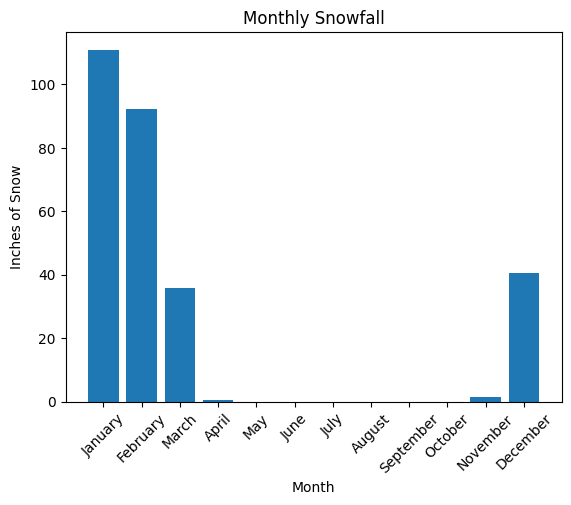

In [73]:
# Select only the necessary columns
snowfall_data = df[['DATE', 'DailySnowfall']]

# Convert the 'DATE' column to datetime type
snowfall_data['DATE'] = pd.to_datetime(snowfall_data['DATE'])

# Extract the month from the 'DATE' column
snowfall_data['Month'] = snowfall_data['DATE'].dt.month

# Group the data by month and sum the snowfall
monthly_snowfall = snowfall_data.groupby('Month')['DailySnowfall'].sum()

# Get the names of the months
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the histogram
plt.bar(month_names, monthly_snowfall)
plt.xlabel('Month')
plt.ylabel('Inches of Snow')
plt.title('Monthly Snowfall')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [74]:
# The bar chart does contain Gaussian distrubtion

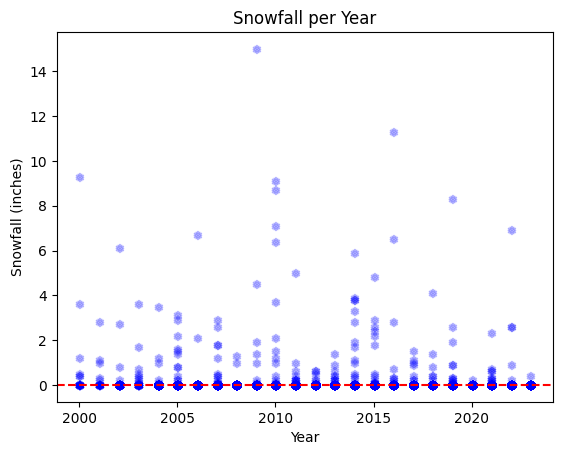

In [79]:
#scatterplot of predicted values and residuals to check assumption of homoscedasticity
# add a horizontal like at 0 to represent the assumption of homoscedasticity
plt.axhline(y=0, color="r", linestyle="--")

# Create scatter plot
plt.scatter(df['YEAR'], df['DailySnowfall'],c='b',alpha= .25, marker=r'$❅$')
plt.xlabel('Year')
plt.ylabel('Snowfall (inches)')
plt.title('Snowfall per Year')
plt.show()

In [161]:
# Extract the month from the 'DATE' column
snowfall_data['Year'] = snowfall_data['DATE'].dt.year

# Group the data by month and sum the snowfall
yearly_snowfall = snowfall_data.groupby('Year')['DailySnowfall'].sum()

<ipython-input-161-f091113ac7d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowfall_data['Year'] = snowfall_data['DATE'].dt.year


In [158]:
Year = df['YEAR'].astype(int)
Year = df['YEAR'].astype(float)
yearly_snowfall = yearly_snowfall.astype(float)

Estimated coefficients:
b_0 = 648.8000000000001 
b_1 = -0.32


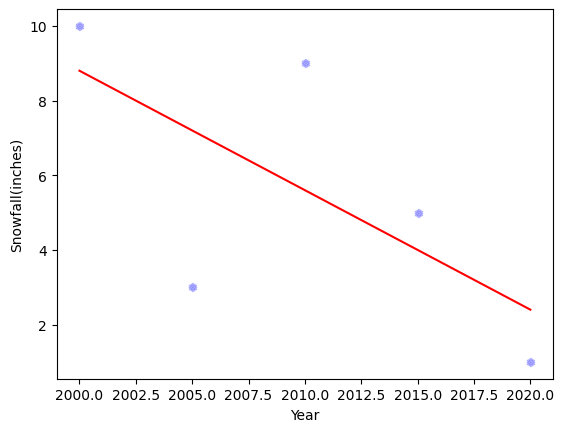

In [164]:

def estimate_coef(Year, yearly_snowfall):
    # number of observations/points
    n = np.size(Year)

    # mean of Year and yearly_snowfall vector
    m_Year = np.mean(Year)
    m_yearly_snowfall = np.mean(yearly_snowfall)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(yearly_snowfall*Year) - n*m_yearly_snowfall*m_Year
    SS_xx = np.sum(Year*Year) - n*m_Year*m_Year

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_yearly_snowfall - b_1*m_Year

    return(b_0, b_1)
def plot_regression_line(Year, yearly_snowfall, b):
    # plotting the actual points as scatter plot
    plt.scatter(Year, yearly_snowfall, color = "b", alpha=0.25, marker=r'$❅$')
    y_pred = b[0] + b[1]*Year
    plt.plot(Year, y_pred, color = "r")
    plt.xlabel('Year')
    plt.ylabel('Snowfall(inches)')
    plt.show()

# sample data
Year = np.array([2000,2005,2010,2015,2020])
yearly_snowfall = np.array([10,3,9,5,1])

# estimating coefficients
b = estimate_coef(Year, yearly_snowfall)
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(Year, yearly_snowfall, b)
